# `ML Project -----------------------------------------`

In [1440]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1441]:
data = pd.read_excel('Concrete_Data.xls')

In [1442]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [1443]:
data.shape

(1030, 9)

In [1444]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [1445]:
data.skew()

Cement (component 1)(kg in a m^3 mixture)                0.509517
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.800737
Fly Ash (component 3)(kg in a m^3 mixture)               0.537445
Water  (component 4)(kg in a m^3 mixture)                0.074324
Superplasticizer (component 5)(kg in a m^3 mixture)      0.908113
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040206
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.252979
Age (day)                                                3.269177
Concrete compressive strength(MPa, megapascals)          0.416922
dtype: float64

In [1446]:
data.isnull().sum()   # bam!! we are lucky

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### All are numerical columns

<AxesSubplot:>

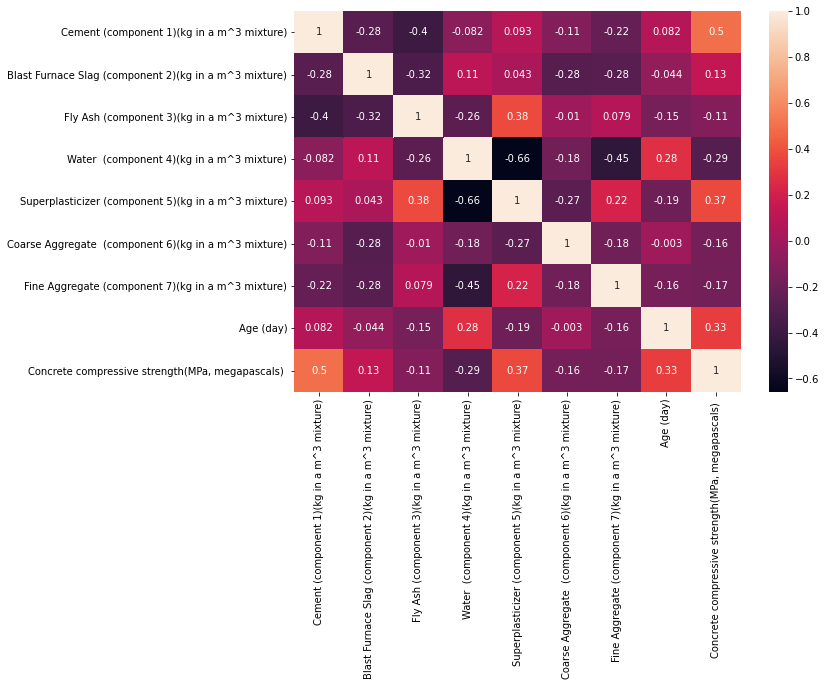

In [1447]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

## `Univariate Analysis --------------------------------------`
### Cement (component 1)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)'>

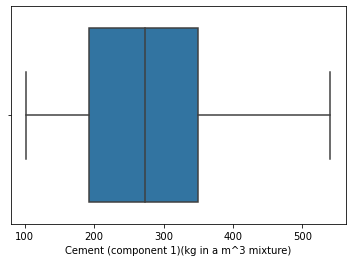

In [1448]:
sns.boxplot(data['Cement (component 1)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Density'>

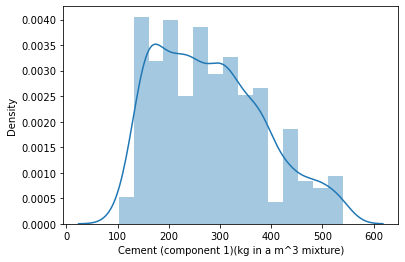

In [1449]:
sns.distplot(data['Cement (component 1)(kg in a m^3 mixture)'])

### Blast Furnace Slag (component 2)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)', ylabel='Density'>

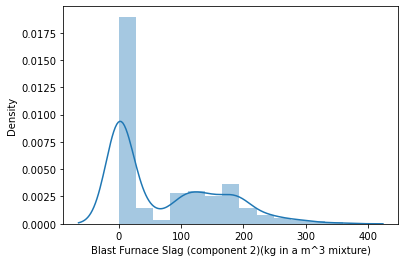

In [1450]:
sns.distplot(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'>

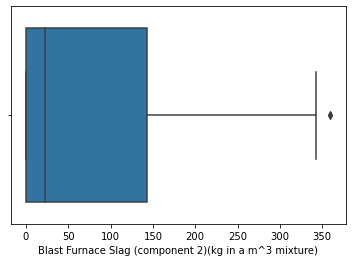

In [1451]:
sns.boxplot(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

In [1452]:
q1=np.percentile(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],25)
q3=np.percentile(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'lower bound = {lower_bound} and upper bound = {upper_bound}')

lower bound = -214.42499999999998 and upper bound = 357.375


In [1453]:
data = data[data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] <= upper_bound]   # remove outliers

In [1454]:
data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].skew()

0.7729796283388737

### Fly Ash (component 3)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)', ylabel='Density'>

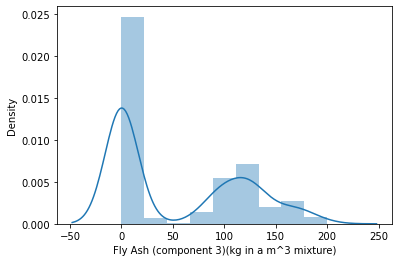

In [1455]:
sns.distplot(data['Fly Ash (component 3)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)'>

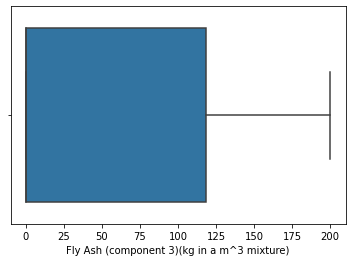

In [1456]:
sns.boxplot(data['Fly Ash (component 3)(kg in a m^3 mixture)'])

### Water  (component 4)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Density'>

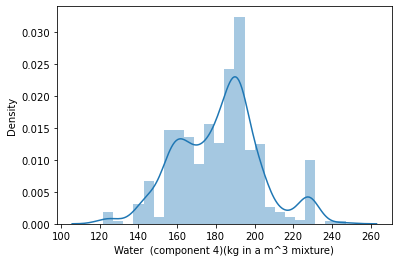

In [1457]:
sns.distplot(data['Water  (component 4)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)'>

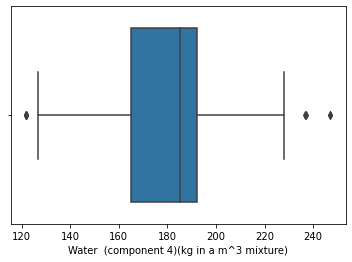

In [1458]:
sns.boxplot(data['Water  (component 4)(kg in a m^3 mixture)'])

In [1459]:
q1=np.percentile(data['Water  (component 4)(kg in a m^3 mixture)'],25)
q3=np.percentile(data['Water  (component 4)(kg in a m^3 mixture)'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'lower bound = {lower_bound} and upper bound = {upper_bound}')

lower bound = 124.25000000000001 and upper bound = 232.64999999999998


In [1460]:
data = data[data['Water  (component 4)(kg in a m^3 mixture)'] <= upper_bound]   # remove outliers
data = data[data['Water  (component 4)(kg in a m^3 mixture)'] > lower_bound]   # remove outliers

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)'>

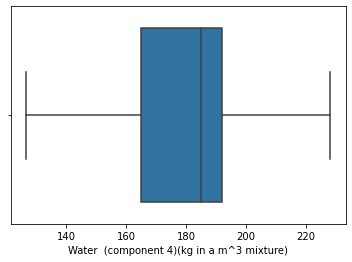

In [1461]:
sns.boxplot(data['Water  (component 4)(kg in a m^3 mixture)'])

In [1462]:
data['Water  (component 4)(kg in a m^3 mixture)'].skew()

0.09447344513453834

### Superplasticizer (component 5)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Density'>

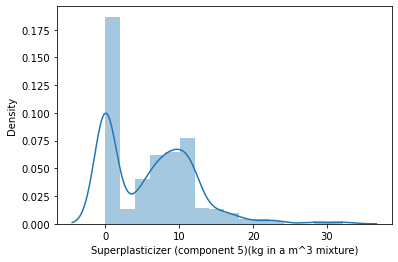

In [1463]:
sns.distplot(data['Superplasticizer (component 5)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

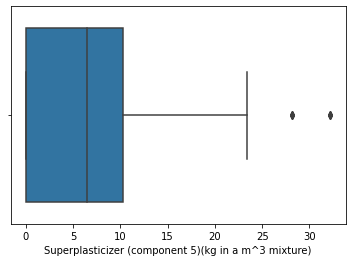

In [1464]:
sns.boxplot(data['Superplasticizer (component 5)(kg in a m^3 mixture)'])

In [1465]:
q1=np.percentile(data['Superplasticizer (component 5)(kg in a m^3 mixture)'],25)
q3=np.percentile(data['Superplasticizer (component 5)(kg in a m^3 mixture)'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'lower bound = {lower_bound} and upper bound = {upper_bound}')

lower bound = -15.450000000000001 and upper bound = 25.75


In [1466]:
data = data[data['Superplasticizer (component 5)(kg in a m^3 mixture)'] <= upper_bound]   # remove outliers

In [1467]:
data['Superplasticizer (component 5)(kg in a m^3 mixture)'].skew()

0.46357406952977326

### Coarse Aggregate  (component 6)(kg in a m^3 mixture)

<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)', ylabel='Density'>

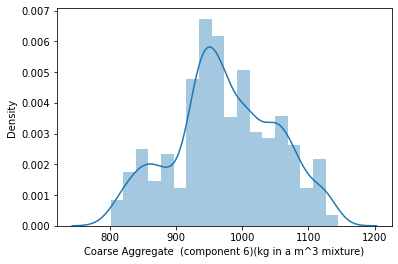

In [1468]:
sns.distplot(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)'>

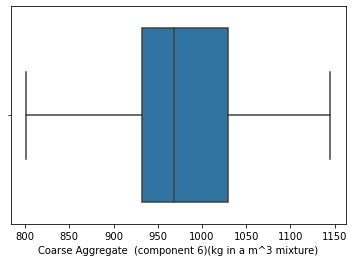

In [1469]:
sns.boxplot(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])

### Fine Aggregate (component 7)(kg in a m^3 mixture) 

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)', ylabel='Density'>

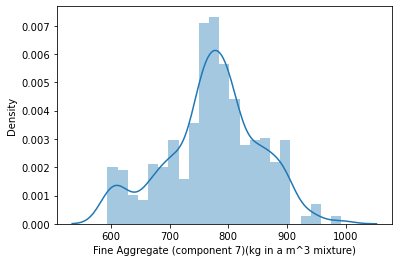

In [1470]:
sns.distplot(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)'>

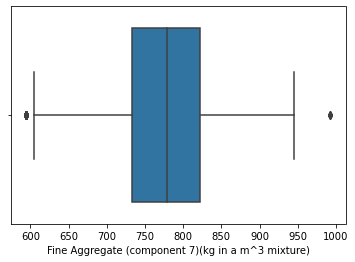

In [1471]:
sns.boxplot(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

In [1472]:
q1=np.percentile(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'],25)
q3=np.percentile(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'lower bound = {lower_bound} and upper bound = {upper_bound}')

lower bound = 598.2 and upper bound = 956.6000000000001


In [1473]:
data = data[data['Fine Aggregate (component 7)(kg in a m^3 mixture)'] <= upper_bound]   # remove outliers
data = data[data['Fine Aggregate (component 7)(kg in a m^3 mixture)'] > lower_bound]   # remove outliers

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)'>

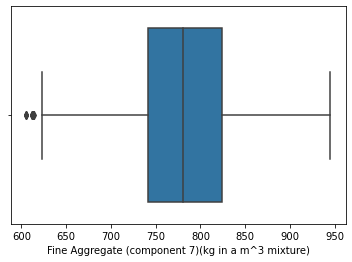

In [1474]:
sns.boxplot(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

### Age (day)

<AxesSubplot:xlabel='Age (day)', ylabel='Density'>

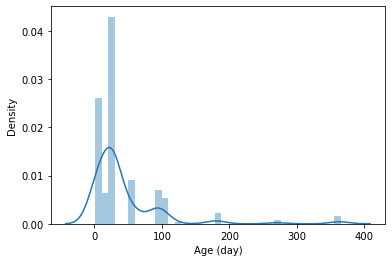

In [1475]:
sns.distplot(data['Age (day)'])

<AxesSubplot:xlabel='Age (day)'>

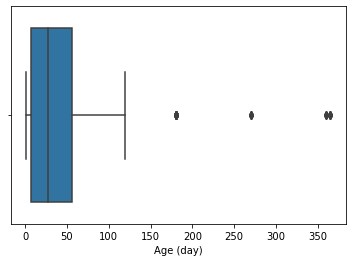

In [1476]:
sns.boxplot(data['Age (day)'])

### log transformation to remove skewness

In [1477]:
data['Age (day)'] = np.log(data['Age (day)'])

<AxesSubplot:xlabel='Age (day)', ylabel='Density'>

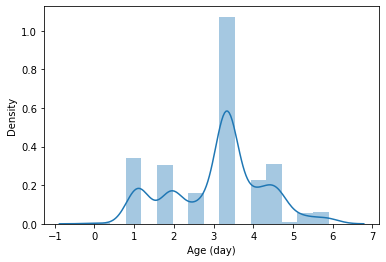

In [1478]:
sns.distplot(data['Age (day)'])

<AxesSubplot:xlabel='Age (day)'>

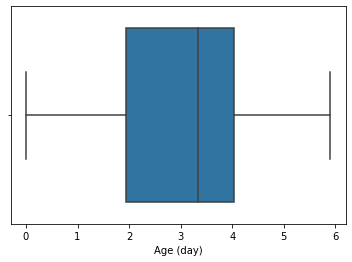

In [1479]:
sns.boxplot(data['Age (day)'])

### Concrete compressive strength(MPa, megapascals)

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

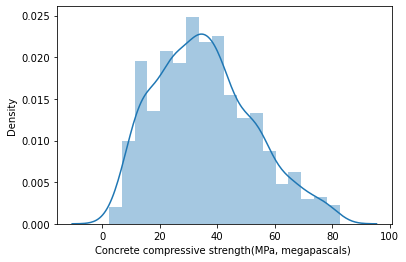

In [1480]:
sns.distplot(data['Concrete compressive strength(MPa, megapascals) '])

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) '>

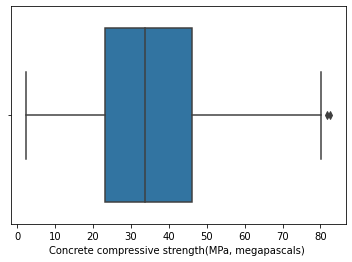

In [1481]:
sns.boxplot(data['Concrete compressive strength(MPa, megapascals) '])

In [1482]:
q1=np.percentile(data['Concrete compressive strength(MPa, megapascals) '],25)
q3=np.percentile(data['Concrete compressive strength(MPa, megapascals) '],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'lower bound = {lower_bound} and upper bound = {upper_bound}')

lower bound = -11.4507312235 and upper bound = 80.84321561249999


In [1483]:
data = data[data['Concrete compressive strength(MPa, megapascals) '] <= upper_bound]   # remove outliers

## `Multivariate Analysis ---------------------------------------`

In [1484]:
X = data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']

### correlation test with target variable

In [1485]:
from scipy.stats import pearsonr
for i in X.columns:
    correlation, p_value = pearsonr(data[i],data['Concrete compressive strength(MPa, megapascals) '])
    print(f'Coorelation = {correlation} and p-value = {p_value}')

Coorelation = 0.48966607495340264 and p-value = 9.433436276912463e-60
Coorelation = 0.13912199328183875 and p-value = 1.3428823374235638e-05
Coorelation = -0.08135878568957747 and p-value = 0.01116602825090356
Coorelation = -0.317474761789753 and p-value = 3.352962813196797e-24
Coorelation = 0.3535329754666497 and p-value = 5.423993617616789e-30
Coorelation = -0.14680939843333093 and p-value = 4.304741998158971e-06
Coorelation = -0.20876910936505724 and p-value = 4.9324780455578353e-11
Coorelation = 0.5674276844251251 and p-value = 6.427167317640142e-84


### `All variables are related to target variable`

### log transformation of target variable

In [1486]:
# data['Concrete compressive strength(MPa, megapascals) '] = np.log(data['Concrete compressive strength(MPa, megapascals) '])

### Cement (component 1)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

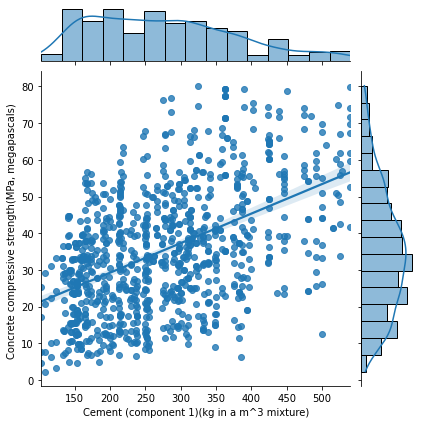

In [1487]:
sns.jointplot(x='Cement (component 1)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Blast Furnace Slag (component 2)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

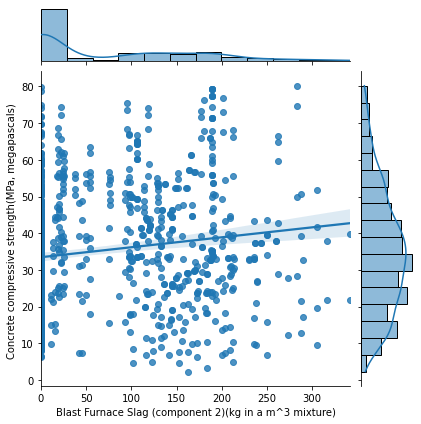

In [1488]:
sns.jointplot(x='Blast Furnace Slag (component 2)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Fly Ash (component 3)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

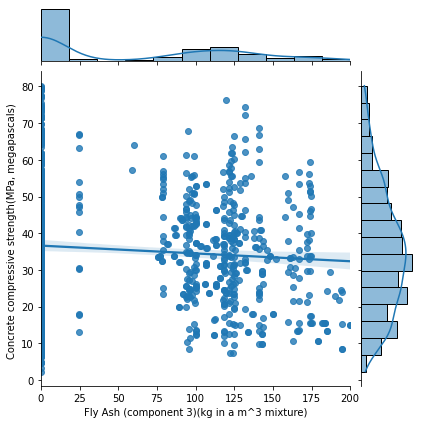

In [1489]:
sns.jointplot(x='Fly Ash (component 3)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Water  (component 4)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

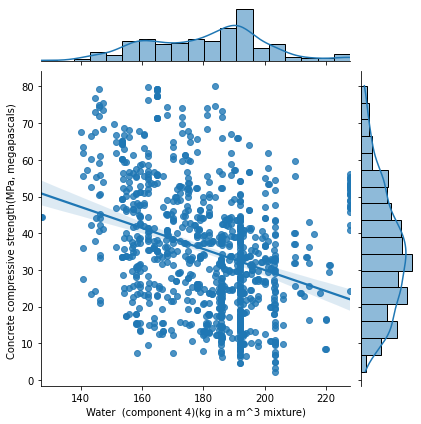

In [1490]:
sns.jointplot(x='Water  (component 4)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Superplasticizer (component 5)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

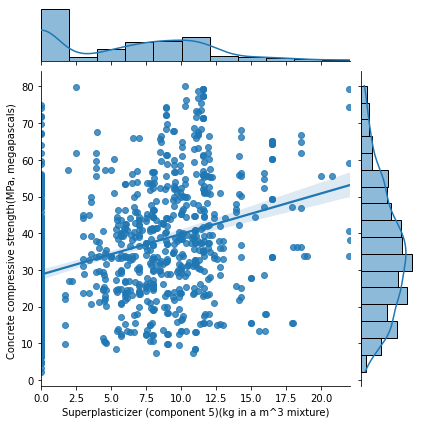

In [1491]:
sns.jointplot(x='Superplasticizer (component 5)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Coarse Aggregate  (component 6)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

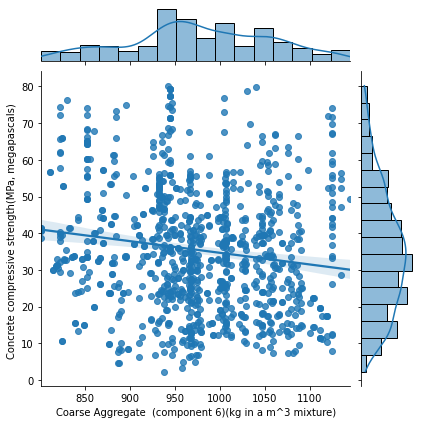

In [1492]:
sns.jointplot(x='Coarse Aggregate  (component 6)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Fine Aggregate (component 7)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals) 

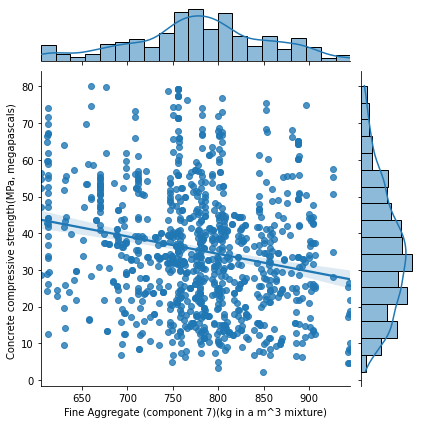

In [1493]:
sns.jointplot(x='Fine Aggregate (component 7)(kg in a m^3 mixture)',y='Concrete compressive strength(MPa, megapascals) ',data=data,kind='reg')

### Age (day) vs Concrete compressive strength(MPa, megapascals) 

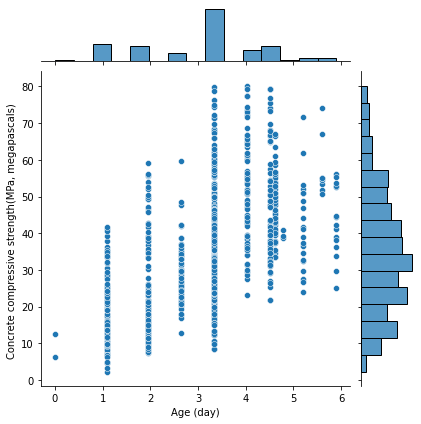

In [1494]:
sns.jointplot(x='Age (day)',y='Concrete compressive strength(MPa, megapascals) ',data=data)

### `Multicollinearity -------------------------------------`

In [1495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [1496]:
cal_vif(X)

,var,VIF
3,Water (component 4)(kg in a m^3 mixture),102.06
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,85.22
6,Fine Aggregate (component 7)(kg in a m^3 mixture),79.80
0,Cement (component 1)(kg in a m^3 mixture),14.56
7,Age (day),8.44
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.22
2,Fly Ash (component 3)(kg in a m^3 mixture),4.70
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,3.42


In [1497]:
import statsmodels.api as sm
X_num  = sm.add_constant(X)
ols_model = sm.OLS(y,X_num)
ols_model = ols_model.fit()
ols_model.pvalues

const                                                     2.903964e-02
Cement (component 1)(kg in a m^3 mixture)                 5.784317e-87
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     8.058643e-46
Fly Ash (component 3)(kg in a m^3 mixture)                7.853645e-19
Water  (component 4)(kg in a m^3 mixture)                 2.974117e-10
Superplasticizer (component 5)(kg in a m^3 mixture)       7.440405e-02
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      9.432180e-03
Fine Aggregate (component 7)(kg in a m^3 mixture)         3.861572e-03
Age (day)                                                1.426467e-257
dtype: float64

### `Scaling`

In [1498]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [1499]:
y = data[:,-1]
X = data[:,:-1]

In [1500]:
X

array([[ 2.58158197, -0.83932684, -0.87611246, ...,  0.82655786,
        -1.38596345,  0.17470239],
       [ 2.58158197, -0.83932684, -0.87611246, ...,  1.02027535,
        -1.38596345,  0.17470239],
       [-0.76416982,  0.70032784, -0.87611246, ...,  0.03102469,
         0.65191328,  2.36663833],
       ...,
       [-1.25515449,  0.78172952,  0.81783484, ..., -1.07962226,
         0.03168993,  0.17470239],
       [-1.1512735 ,  1.33177232, -0.87611246, ...,  0.17566709,
         0.15300834,  0.17470239],
       [-0.15362402,  0.32936875,  0.34521419, ..., -1.4399368 ,
        -0.2204888 ,  0.17470239]])

#### just for finding index

In [1501]:
x = np.array([[[1],[2],[3]],
              [[4],[5],[6]],
              [[4],[1],[9]]])
x[:,:-1]

array([[[1],
        [2]],

       [[4],
        [5]],

       [[4],
        [1]]])

### split the data for modelling

In [1502]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Following 6 models will be modelled and compared:
1. **Linear Regression**
2. **Lasso Regreessor**
3. **Ridge Regressor** : the main idea behind ridge regression is to find a line that do not fit training data as well
4. **Decision Tree Regressor**
5. **Random Forest Regressor**
6. **KNN Regressor**
7. **SVM Regressor**
#### [Evaluation Metrics Advantages and Disadvantages](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)
- **MAE** is a very simple metric which calculates the absolute difference between actual and predicted values.
- **MSE** is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.
- **RMSE** is clear by the name itself, that it is a simple square root of mean squared error.
- **R2** score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.
- **Adj R2** : The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect. Hence, To control this situation Adjusted R Squared came into existence.

## `Linear Regression --------------------------------------`
[Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### `Evaluated on Train Data`

In [1503]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_trainData = model.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.3972329059794154
RSquared is: 84.15%


#### `Evaluated on Test Data`

In [1504]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_testData = model.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_testData))
Rsqr_test = round(r2_score(y_test,y_pred_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.4312283078259585
RSquared is: 81.62%


#### `Hyper Parameter tuning -------------------------------------------------`

## `Lasso Regression --------------------------------------`
- [Lasso Regressor](https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/)
- [Lasso and Ridge Regression](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html)
- [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

#### `Evaluated on Train Data`

In [1505]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)
y_pred_lass_trainData =lasso_reg.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_lass_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_lass_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.48091035499040485
RSquared is: 76.77%


#### `Evaluated on Test Data`

In [1506]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)
y_pred_lass_testData =lasso_reg.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_lass_testData))
Rsqr_test = round(r2_score(y_test,y_pred_lass_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.508578137421479
RSquared is: 74.43%


#### `Hyper Parameter tuning -------------------------------------------`

## `Ridge Regression --------------------------------------`
- [Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

#### `Evaluated on Train Data`

In [1507]:
from sklearn.linear_model import Ridge
lasso_reg = Ridge(alpha=0.1)
lasso_reg.fit(X_train,y_train)
y_pred_ridge_trainData =lasso_reg.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_ridge_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_ridge_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.39723324445644514
RSquared is: 84.15%


#### `Evaluated on Test Data`

In [1508]:
lasso_reg = Ridge(alpha=0.1)
lasso_reg.fit(X_train,y_train)
y_pred_ridge_testData =lasso_reg.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_ridge_testData))
Rsqr_test = round(r2_score(y_test,y_pred_ridge_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.4312575606090155
RSquared is: 81.62%


#### `Hyper Parameter tuning`

## `Decision Tree Regressor --------------------------------`
- [Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

#### `Evaluated on Train Data`

In [1509]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr_trainData = dtr.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_dtr_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_dtr_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.012264961678939104
RSquared is: 99.98%


#### `Evaluated on Test Data`

In [1510]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr_testData = dtr.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_dtr_testData))
Rsqr_test = round(r2_score(y_test,y_pred_dtr_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.44140215080296347
RSquared is: 80.74%


#### `Hyper Parameter tuning`
[Grid Search Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## `Random Forest Regressor --------------------------------`
[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

#### `Evaluated on Train Data`

In [1511]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr_trainData = rfr.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_rfr_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_rfr_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.10410379089976661
RSquared is: 98.91%


#### `Evaluated on Test Data`

In [1512]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr_testData = rfr.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_rfr_testData))
Rsqr_test = round(r2_score(y_test,y_pred_rfr_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.3508655189410726
RSquared is: 87.83%


#### `Hyper Parameter tuning`

## `KNN Regressor --------------------------------`
[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

#### `Evaluated on Train Data`

In [1513]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred_knr_trainData = knr.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_knr_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_knr_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.28874237563918176
RSquared is: 91.63%


#### `Evaluated on Test Data`

In [1514]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred_knr_testData = knr.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_knr_testData))
Rsqr_test = round(r2_score(y_test,y_pred_knr_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.4339786371726988
RSquared is: 81.38%


#### `Hyper Parameter tuning`

## `SVM Regressor --------------------------------`
[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

#### `Evaluated on Train Data`

In [1515]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr_trainData = svr.predict(X_train)
rmse_test =  np.sqrt(mean_squared_error(y_train,y_pred_svr_trainData))
Rsqr_test = round(r2_score(y_train,y_pred_svr_trainData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.2324962801976186
RSquared is: 94.57%


#### `Evaluated on Test Data`

In [1516]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr_testData = svr.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_svr_testData))
Rsqr_test = round(r2_score(y_test,y_pred_svr_testData)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  0.33535421579555985
RSquared is: 88.88%


#### `Hyper Parameter tuning`

### `Random Forest Regressor is working best with the accuracy of 87.83%`